# Principle Component Analysis
***
## What is the point of Principle Component Analysis?

Principle Component Analyis (PCA) is a method of dimension reduction which can be used to take data with many dimesensions and convert it into a new representation with fewer dimensions. The benefit of this is that high dimensional data can then be reduced down to its most significant compnents which enables easy visualisation and can help with data analysis.  

PCA boils down to solving:

$$W^{*} = \sum{\operatorname{argmax_{W^{T}W = I}}} W^{T}X^{T}XW$$

Where $W$ is a matrix containing the eigenvectors of the covariance matrix $X^{T}X$ and then applying the transformation $W$:
$$X_{new} = X_{old}W$$

### The Basics
The purpose of PCA is most intuativly obvious when working with simple a set of simple 2D dataset. Firstly we must lead the data then we can transform it into its PCA representation.


In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython.display import HTML, display

data = pd.read_csv('jupyterfiles/data.csv')
data.head()

data.head()

,X,Y
0,9.1,28.2
1,17.3,52.6
2,-17.5,-15.0
3,-6.7,2.6
4,-15.5,-28.0


The table contains a sample of the basic data we shall be running PCA on - and the graph below visualises the entire dataset

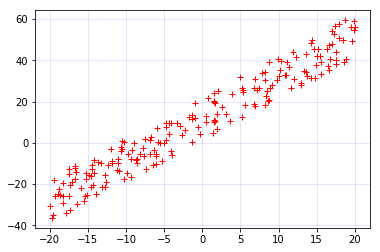

In [4]:
plt.grid(color='b', linestyle='-', linewidth=1, alpha=0.1)
plt.plot(data["X"], data["Y"], "r+")

## Step Two: Mean centring the data
PCA is performed on the mean centred covariance matrix so prior to doing PCA we must first calculate this by summing each column, dividing by the number of elements in the column, and then subtracting the value from every element in the column.

$$X^{C}_{ij} = X^{C}_{ij} - \frac{\sum_{p=0}^{n} X_{pj}}{n}$$



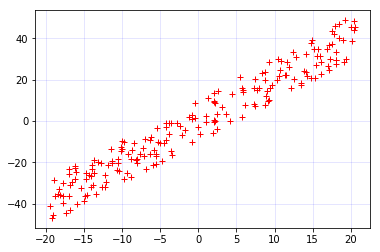

In [21]:
def meanCentre(matrix):
    result = matrix.copy()
    for column in matrix:
        columnTotal = 0
        for i in range(len(matrix[column])):
            columnTotal += matrix[column][i] 
            
        columnMean = columnTotal / len(matrix[column])
        
        for i in range(len(matrix[column])):
            result[column][i] -= columnMean
    
    return result

centredData = meanCentre(data)
centredData.head()

plt.grid(color='b', linestyle='-', linewidth=1, alpha=0.1)
plt.plot(centredData["X"], centredData["Y"], "r+")

## Step One: Finding the vector of most variance
In order to find the PCA representation of our data we should first find the vector of greatest variance within our data, conviently this is the larget eigenvector, (the eigenvector with the largest eigenvalue λ). There are many possible methods to finding the largest eigenvector:
2. Power Iteration
3. Finding component maximum variance

### Power Iteration
Power iteration is a method of estimating the eigenvectors of a square matrix. The algorithm can estimate the largest eigenvector of a data set as long as it is significantly dominating, i.e. its eigenvalue is significantly larger, than he other eigenvalues.

In [49]:
def multiplyDataFrames(a, b):
    mul = np.matmul(a,  b)
    res = pd.DataFrame(mul)
    return res

def normalizeMatrix(matrix):
    matrixSum = 0
    for index, element in matrix.iterrows():
        matrixSum += element ** 2
    return matrix / np.sqrt(matrixSum)
    
def powerIteration(matrix):
    covarianceMatrix = centredData.cov()    
    w = pd.DataFrame([random.randint(-100000,100000)/100 for i in range(0, centredData.shape[1])])
    w = normalizeMatrix(w)    
    
    for i in range(100):
        w = multiplyDataFrames(covarianceMatrix, w)        
        w = normalizeMatrix(w)  
    
    return w

### Black Box Solution
The eigenvectors and values of a square matrix can also be computed using the `eig` function from `numpy`. In order to be compatible with our iterative PCA function, as defined lower down, we can use the `eig` function to compute the eigenvalues and vectors of a given matrix and then simply return the eigenvector with the largest corresponding eigenvalue.

In [138]:
def blackBoxLargestEigenVector(matrix):
    eigenValues, eigenVectors = np.linalg.eig(matrix.cov())
    
    indexOfLargestEigenValue = 0
    largestEigenValue = eigenValues[0]
    
    for i in range(len(eigenValues)):
        if eigenValues[i] > largestEigenValue:
            largestEigenValue = eigenValues[i]
            indexOfLargestEigenValue = i
            
    n = pd.DataFrame(eigenVectors[indexOfLargestEigenValue])
    
    return n

### Iterative PCA Algorithm
Once a method for computing the largest eigenvector has been defined then we can use this as part of performing PCA. Our iterative algorithm computes $W$ which is the transformation that converts the existing mean centred data to its PCA represention. The algorithm is:
1. Calculate the mean centred data
2. Set z to a copy of the mean centred data
3. For i from 0 to k:
    1. Calculate the largest eigenvector of the matrix z
    2. Append the largest eigenvector to w
    3. Set z to a copy of the mean centred data
    4. For j from 0 to (k + 1):
        1. Remove the projection of the so far computed eigenvectors, in w, from the data in z
4. Return w


In [139]:
def pca(data, k, firstEigenVectorFunc):
    centredData = meanCentre(data)
    w = pd.DataFrame()
    z = centredData.copy()   
    
    for i in range(k):
        wi = firstEigenVectorFunc(z) 
        wi.columns = [i]
        w = pd.concat([w, wi], axis = 1)
        z = centredData.copy()
        for j in range(i + 1):
            wjwjt = multiplyDataFrames(pd.DataFrame(w[j]), pd.DataFrame(w[j]).transpose())
            
            projection = multiplyDataFrames(centredData.copy(), wjwjt)
            z = np.subtract(z, projection) 
        
    return w

### One Dimensional Representation

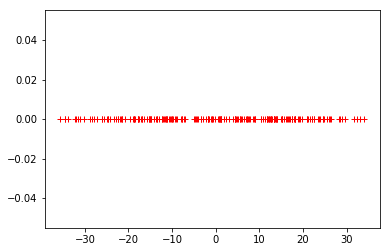

In [147]:
w = pca(data, 1, blackBoxLargestEigenVector)

xNew = multiplyDataFrames(centredData, w)
plt.plot(xNew[0], [0] * 200, "r+")

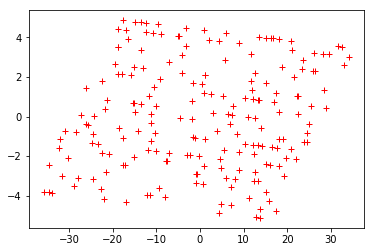

In [146]:
w = pca(data, 2, blackBoxLargestEigenVector)

xNew = multiplyDataFrames(centredData, w)
plt.plot(xNew[0], xNew[1], "r+")